In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential

In [59]:
img_height = 180
img_width = 180

In [60]:
data_train_path = 'TRAIN'
data_test_path = 'TEST'

In [61]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(img_width,img_height),
    shuffle=True,
    batch_size=32,
    validation_split=0.1,
    subset="training",
    seed=42,
)

Found 22564 files belonging to 2 classes.
Using 20308 files for training.


In [62]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(img_width,img_height),
    shuffle=True,
    batch_size=32,
    validation_split=0.1,
    subset="validation",
    seed=42,
)

Found 22564 files belonging to 2 classes.
Using 2256 files for validation.


In [63]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width,img_height),
    shuffle=True,
    batch_size=32,
)

Found 2513 files belonging to 2 classes.


In [64]:
classes = data_train.class_names
classes

['O', 'R']

2024-03-31 23:46:27.148198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20308]
	 [[{{node Placeholder/_0}}]]
2024-03-31 23:46:27.148435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20308]
	 [[{{node Placeholder/_4}}]]


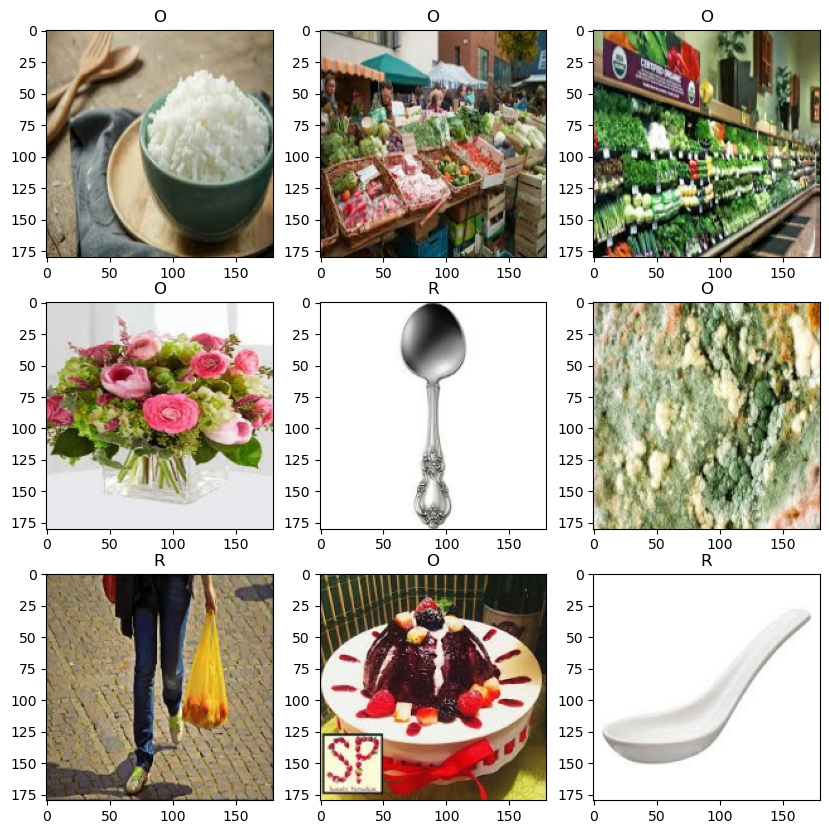

In [67]:
plt.figure(figsize=(10,10))
for image, labels in data_train.skip(1).take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
plt.show()

In [68]:
from collections import Counter
class_counter = Counter()

for _, labels in data_train:
    class_counter.update(labels.numpy())

for class_label, count in class_counter.items():
    class_name = classes[class_label]
    print(f"Class: {class_name}, Frequency: {count}")

2024-03-31 23:46:29.952812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20308]
	 [[{{node Placeholder/_4}}]]
2024-03-31 23:46:29.953388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20308]
	 [[{{node Placeholder/_4}}]]


Class: R, Frequency: 8999
Class: O, Frequency: 11309


In [69]:
from collections import Counter
class_counter = Counter()

for _, labels in data_test:
    class_counter.update(labels.numpy())

for class_label, count in class_counter.items():
    class_name = classes[class_label]
    print(f"Class: {class_name}, Frequency: {count}")

2024-03-31 23:46:33.171717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2513]
	 [[{{node Placeholder/_0}}]]
2024-03-31 23:46:33.171901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2513]
	 [[{{node Placeholder/_0}}]]


Class: R, Frequency: 1112
Class: O, Frequency: 1401


In [70]:
from collections import Counter
class_counter = Counter()

for _, labels in data_val:
    class_counter.update(labels.numpy())

for class_label, count in class_counter.items():
    class_name = classes[class_label]
    print(f"Class: {class_name}, Frequency: {count}")

2024-03-31 23:46:35.470173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2256]
	 [[{{node Placeholder/_4}}]]
2024-03-31 23:46:35.470835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2256]
	 [[{{node Placeholder/_4}}]]


Class: R, Frequency: 1000
Class: O, Frequency: 1256


In [71]:
pretrained_model_efficientb0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    classes=len(classes),
    classifier_activation="swish",
)

for layer in pretrained_model_efficientb0.layers:
    layer.trainable=False

In [72]:
model = Sequential([
    pretrained_model_efficientb0,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='swish'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [73]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 6, 6, 1280)       4049571   
                                                                 
 global_average_pooling2d_9   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 512)               655872    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 513       
                                                                 
Total params: 4,705,956
Trainable params: 656,385
Non-trainable params: 4,049,571
______________________________________

In [74]:
model.compile(
    optimizer=optimizers.legacy.Adam(learning_rate=0.002),
    loss='binary_crossentropy',
    metrics=['acc']
)

In [75]:
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs = 10
)

Epoch 1/10
635/635 [==============================] - 372s 583ms/step - loss: 0.1542 - acc: 0.9419 - val_loss: 0.1145 - val_acc: 0.9561
Epoch 2/10
635/635 [==============================] - 539s 849ms/step - loss: 0.0940 - acc: 0.9648 - val_loss: 0.1146 - val_acc: 0.9592
Epoch 3/10
635/635 [==============================] - 538s 846ms/step - loss: 0.0652 - acc: 0.9756 - val_loss: 0.1316 - val_acc: 0.9570
Epoch 4/10
635/635 [==============================] - 523s 824ms/step - loss: 0.0454 - acc: 0.9834 - val_loss: 0.1419 - val_acc: 0.9610
Epoch 5/10
635/635 [==============================] - 522s 823ms/step - loss: 0.0378 - acc: 0.9856 - val_loss: 0.1709 - val_acc: 0.9601
Epoch 6/10
635/635 [==============================] - 509s 801ms/step - loss: 0.0343 - acc: 0.9889 - val_loss: 0.1653 - val_acc: 0.9619
Epoch 7/10
635/635 [==============================] - 521s 821ms/step - loss: 0.0277 - acc: 0.9906 - val_loss: 0.1764 - val_acc: 0.9601
Epoch 8/10
635/635 [============================

In [85]:
model.evaluate(data_test)

79/79 [==============================] - 42s 528ms/step - loss: 0.4693 - acc: 0.9069


[0.46926814317703247, 0.9068841934204102]

In [77]:
history.history

{'loss': [0.1542382389307022,
  0.09403917193412781,
  0.06515921652317047,
  0.0453665666282177,
  0.03784332796931267,
  0.03427492454648018,
  0.02770496904850006,
  0.02736678160727024,
  0.02419321797788143,
  0.02004454843699932],
 'acc': [0.9419440627098083,
  0.9648414254188538,
  0.9756253957748413,
  0.9834055304527283,
  0.9855721592903137,
  0.9889206290245056,
  0.9905948638916016,
  0.9910380244255066,
  0.9919243454933167,
  0.993303120136261],
 'val_loss': [0.1144770085811615,
  0.11461582779884338,
  0.1316206306219101,
  0.14187046885490417,
  0.1708827167749405,
  0.1653243601322174,
  0.17636732757091522,
  0.17701949179172516,
  0.18261685967445374,
  0.177452951669693],
 'val_acc': [0.9561170339584351,
  0.9592198729515076,
  0.9570035338401794,
  0.9609929323196411,
  0.960106372833252,
  0.9618794322013855,
  0.960106372833252,
  0.958776593208313,
  0.960106372833252,
  0.958776593208313]}

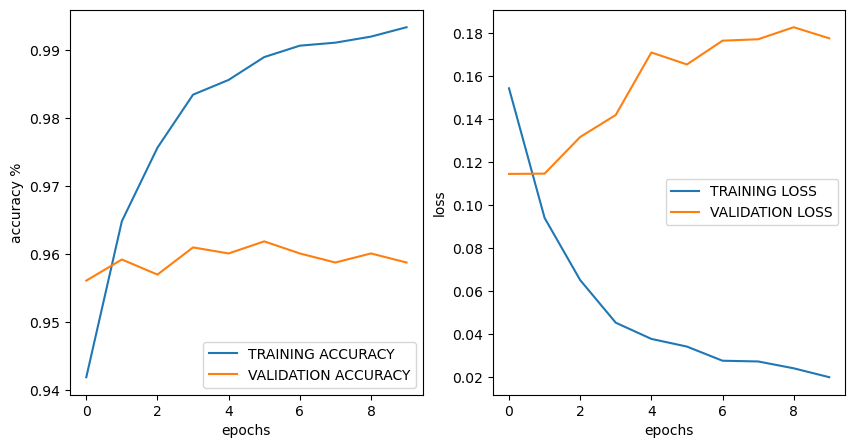

In [79]:
temp = range(10)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(temp,history.history.get('acc'),label = 'TRAINING ACCURACY')
plt.plot(temp,history.history.get('val_acc'),label = 'VALIDATION ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy %')
plt.legend()

plt.subplot(1,2,2)
plt.plot(temp,history.history.get('loss'),label = 'TRAINING LOSS')
plt.plot(temp,history.history.get('val_loss'),label = 'VALIDATION LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [86]:
images = []
labels = []
test_iterator = data_test.as_numpy_iterator()

for image, label in test_iterator:
    images.append(image)
    labels.append(label)

X_test = np.concatenate(images)
y_test = np.concatenate(labels)

print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_test Shape: (2513, 180, 180, 3)
y_test Shape: (2513,)


In [87]:
y_predicted = model.predict(X_test)
y_predicted

79/79 [==============================] - 50s 629ms/step


array([[1.1034849e-05],
       [8.6557489e-12],
       [9.9745923e-01],
       ...,
       [9.9639523e-01],
       [1.3313761e-11],
       [9.9999863e-01]], dtype=float32)

In [88]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [89]:
y_test

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [90]:
from sklearn.metrics import classification_report
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92      1401
           1       0.98      0.81      0.88      1112

    accuracy                           0.91      2513
   macro avg       0.92      0.90      0.90      2513
weighted avg       0.92      0.91      0.91      2513



In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1381,   20],
       [ 214,  898]])

Text(50.722222222222214, 0.5, 'Truth')

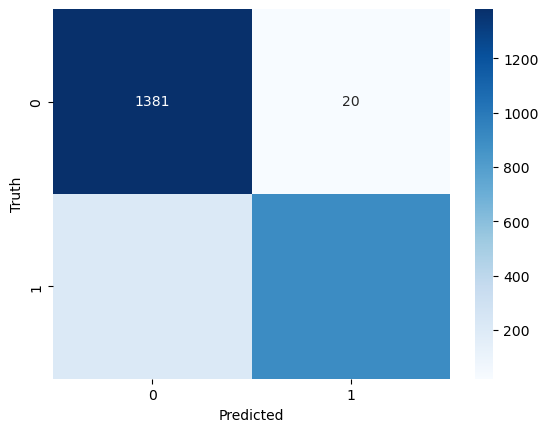

In [95]:
import seaborn as sn
# plt.figure(figsize = (10,7))
sn.heatmap(cm ,annot=True ,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')